In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import warnings
warnings.filterwarnings("ignore")

In [2]:
#sns.set(style="darkgrid", font="SimHei",font_scale=1.5,rc={"axes.unicode_minus":False})

columns=["player_fifa_api_id","date","overall_rating","potential","preferred_foot","crossing","finishing","heading_accuracy",
         "short_passing","volleys","dribbling","curve","free_kick_accuracy","long_passing","ball_control","acceleration",
         "sprint_speed","agility","reactions","balance","shot_power","jumping","stamina","strength","long_shots","aggression",
         "interceptions", "positioning","vision","penalties","marking","standing_tackle","sliding_tackle","gk_diving",
         "gk_handling","gk_kicking","gk_positioning","gk_reflexes"]
data=pd.read_csv("player_attributes.csv",usecols=columns)
data.head()
print(data.shape)

(183978, 38)


In [3]:
#data.info()
#data.isnull().sum(axis=0)
data.dropna(axis=0,inplace=True)
data.drop_duplicates(inplace=True)
print(data.shape)

(181139, 38)


In [4]:
data.to_csv("player_attributes_new.csv")

In [7]:
columns=["overall_rating","potential","crossing","finishing","heading_accuracy","short_passing","volleys",
         "dribbling","curve","free_kick_accuracy","long_passing","ball_control","acceleration","sprint_speed","agility",
         "reactions","balance","shot_power","jumping","stamina","strength","long_shots","aggression","interceptions", 
         "positioning","vision","penalties","marking","standing_tackle","sliding_tackle","gk_diving","gk_handling",
         "gk_kicking","gk_positioning","gk_reflexes"]
data=pd.read_csv("player_attributes_new.csv",usecols=columns)
data.describe()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,181139.000000,181139.000000,181139.000000,181139.000000,181139.000000,181139.000000,181139.000000,181139.000000,181139.000000,181139.000000,...,181139.000000,181139.000000,181139.000000,181139.000000,181139.000000,181139.000000,181139.000000,181139.000000,181139.000000,181139.000000
mean,68.618989,73.469126,55.113808,49.931257,57.261788,62.457511,49.463925,59.224778,52.957386,49.369539,...,57.868212,54.933664,46.758434,50.350653,48.015458,14.711034,15.979104,20.631140,16.047626,16.357284
std,7.029804,6.581107,17.247608,19.044620,16.483626,14.181691,18.255121,17.743892,18.249664,17.816582,...,15.139479,15.556525,21.229433,21.495401,21.598718,16.858520,15.860281,21.212656,16.093279,17.199625
min,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,41.000000,36.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,63.000000,...,69.000000,66.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,97.000000,...,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


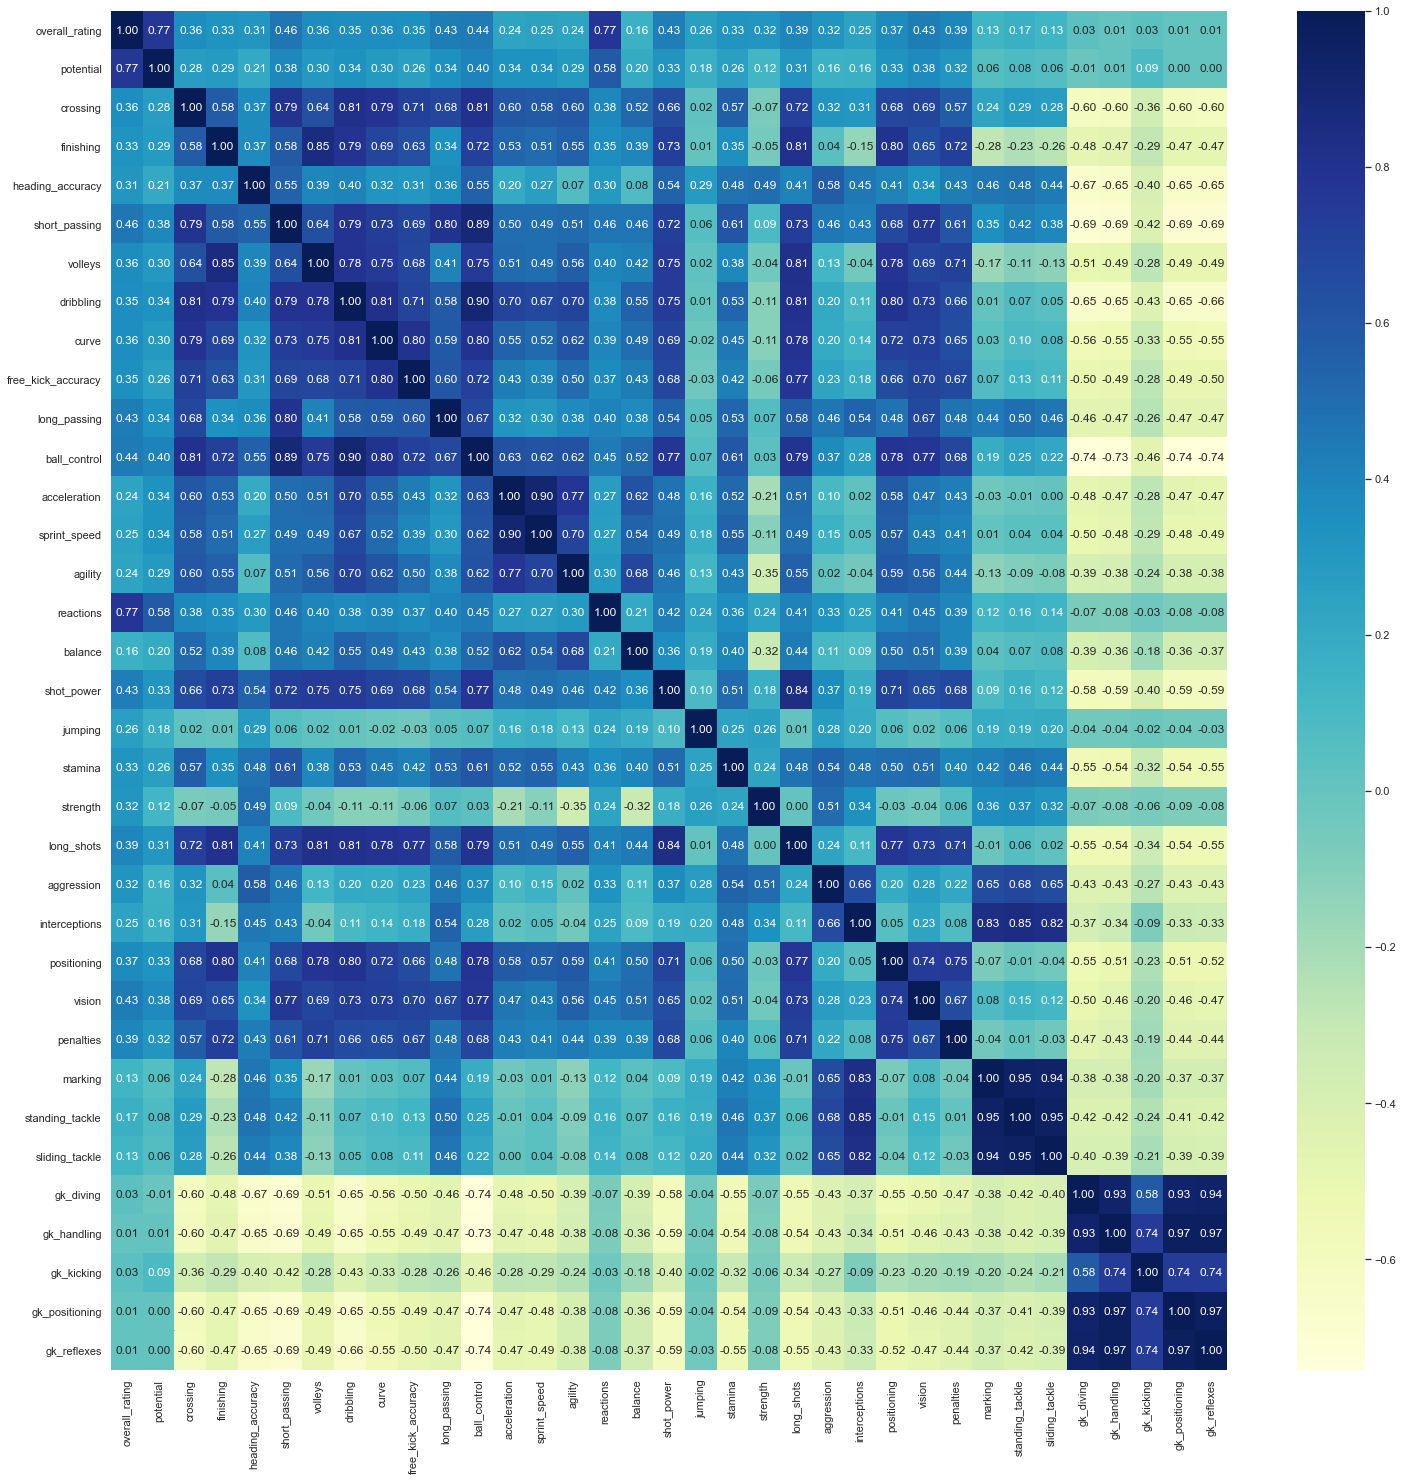

In [80]:
cor_matrix=data.corr()
sns.set(font_scale=1)
cor_matrix.to_csv("./newdata/cor_matrix.csv")
plt.figure(figsize=(25,25))
cor_map=sns.heatmap(cor_matrix,annot=True,fmt=".2f",cmap="YlGnBu")
heatmap=cor_map.get_figure()
heatmap.savefig("./newdata/cor_map.png")

<AxesSubplot:xlabel='gk_reflexes', ylabel='Density'>

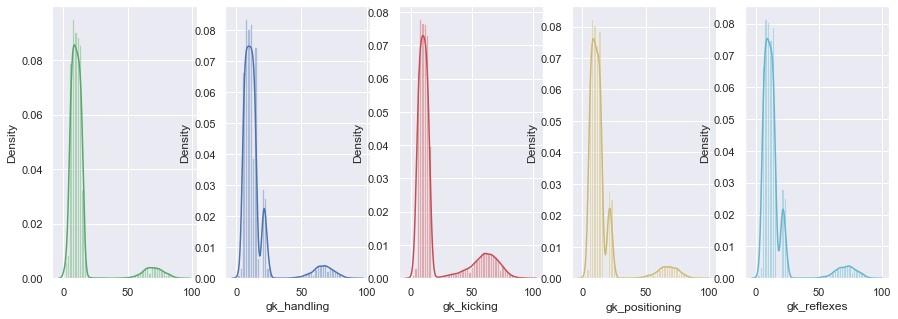

In [53]:
fig, ax = plt.subplots(1, 5)
fig.set_size_inches((15, 5))
sns.distplot(data[["gk_diving"]],ax=ax[0],color="g")
sns.distplot(data["gk_handling"],bins=50,ax=ax[1],color="b")
sns.distplot(data["gk_kicking"],bins=50,ax=ax[2],color="r")
sns.distplot(data["gk_positioning"],bins=50,ax=ax[3],color="y")
sns.distplot(data["gk_reflexes"],bins=50,ax=ax[4],color="c")

In [11]:
columns=["overall_rating","potential","crossing","finishing","heading_accuracy","short_passing","volleys",
         "dribbling","curve","free_kick_accuracy","long_passing","ball_control","acceleration","sprint_speed","agility",
         "reactions","balance","shot_power","jumping","stamina","strength","long_shots","aggression","interceptions", 
         "positioning","vision","penalties","marking","standing_tackle","sliding_tackle","gk_diving","gk_handling",
         "gk_kicking","gk_positioning","gk_reflexes"]
data_g=pd.read_csv("./newdata/player_attributes_gk.csv",usecols=columns)
data_g.describe()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,14189.000000,14189.000000,14189.000000,14189.000000,14189.000000,14189.000000,14034.000000,14189.000000,14034.000000,14189.000000,...,14034.000000,14189.000000,14189.000000,14189.000000,14034.000000,14189.000000,14189.000000,14189.000000,14189.000000,14189.000000
mean,68.928184,73.003806,18.781803,18.176757,19.180985,28.129255,17.365256,18.900627,17.665028,18.423356,...,31.533134,29.690323,18.447459,18.976320,18.033134,70.508845,67.156248,64.875678,68.009514,72.102333
std,6.754056,6.681947,6.642957,6.877839,7.290700,7.610732,6.869697,6.643802,6.983444,9.413795,...,12.781989,14.451135,6.687263,7.009509,7.303899,7.315334,7.283588,8.127823,7.699566,7.610790
min,48.000000,53.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,50.000000,50.000000,32.000000,50.000000,50.000000
25%,64.000000,68.000000,12.000000,12.000000,13.000000,23.000000,12.000000,13.000000,12.000000,12.000000,...,25.000000,21.000000,12.000000,12.000000,12.000000,65.000000,62.000000,59.000000,63.000000,67.000000
50%,69.000000,73.000000,20.000000,19.000000,20.000000,27.000000,16.000000,20.000000,16.000000,16.000000,...,27.000000,25.000000,19.000000,20.000000,16.000000,70.000000,67.000000,65.000000,68.000000,72.000000
75%,74.000000,78.000000,25.000000,25.000000,25.000000,33.000000,25.000000,25.000000,25.000000,25.000000,...,38.000000,35.000000,25.000000,25.000000,25.000000,76.000000,72.000000,70.000000,74.000000,78.000000
max,93.000000,93.000000,56.000000,56.000000,74.000000,75.000000,51.000000,70.000000,62.000000,94.000000,...,83.000000,94.000000,68.000000,63.000000,63.000000,94.000000,93.000000,92.000000,96.000000,96.000000


In [12]:
#data.info()
#data.isnull().sum(axis=0)
data_g.dropna(axis=0,inplace=True)
data_g.drop_duplicates(inplace=True)
print(data_g.shape)

(11109, 35)


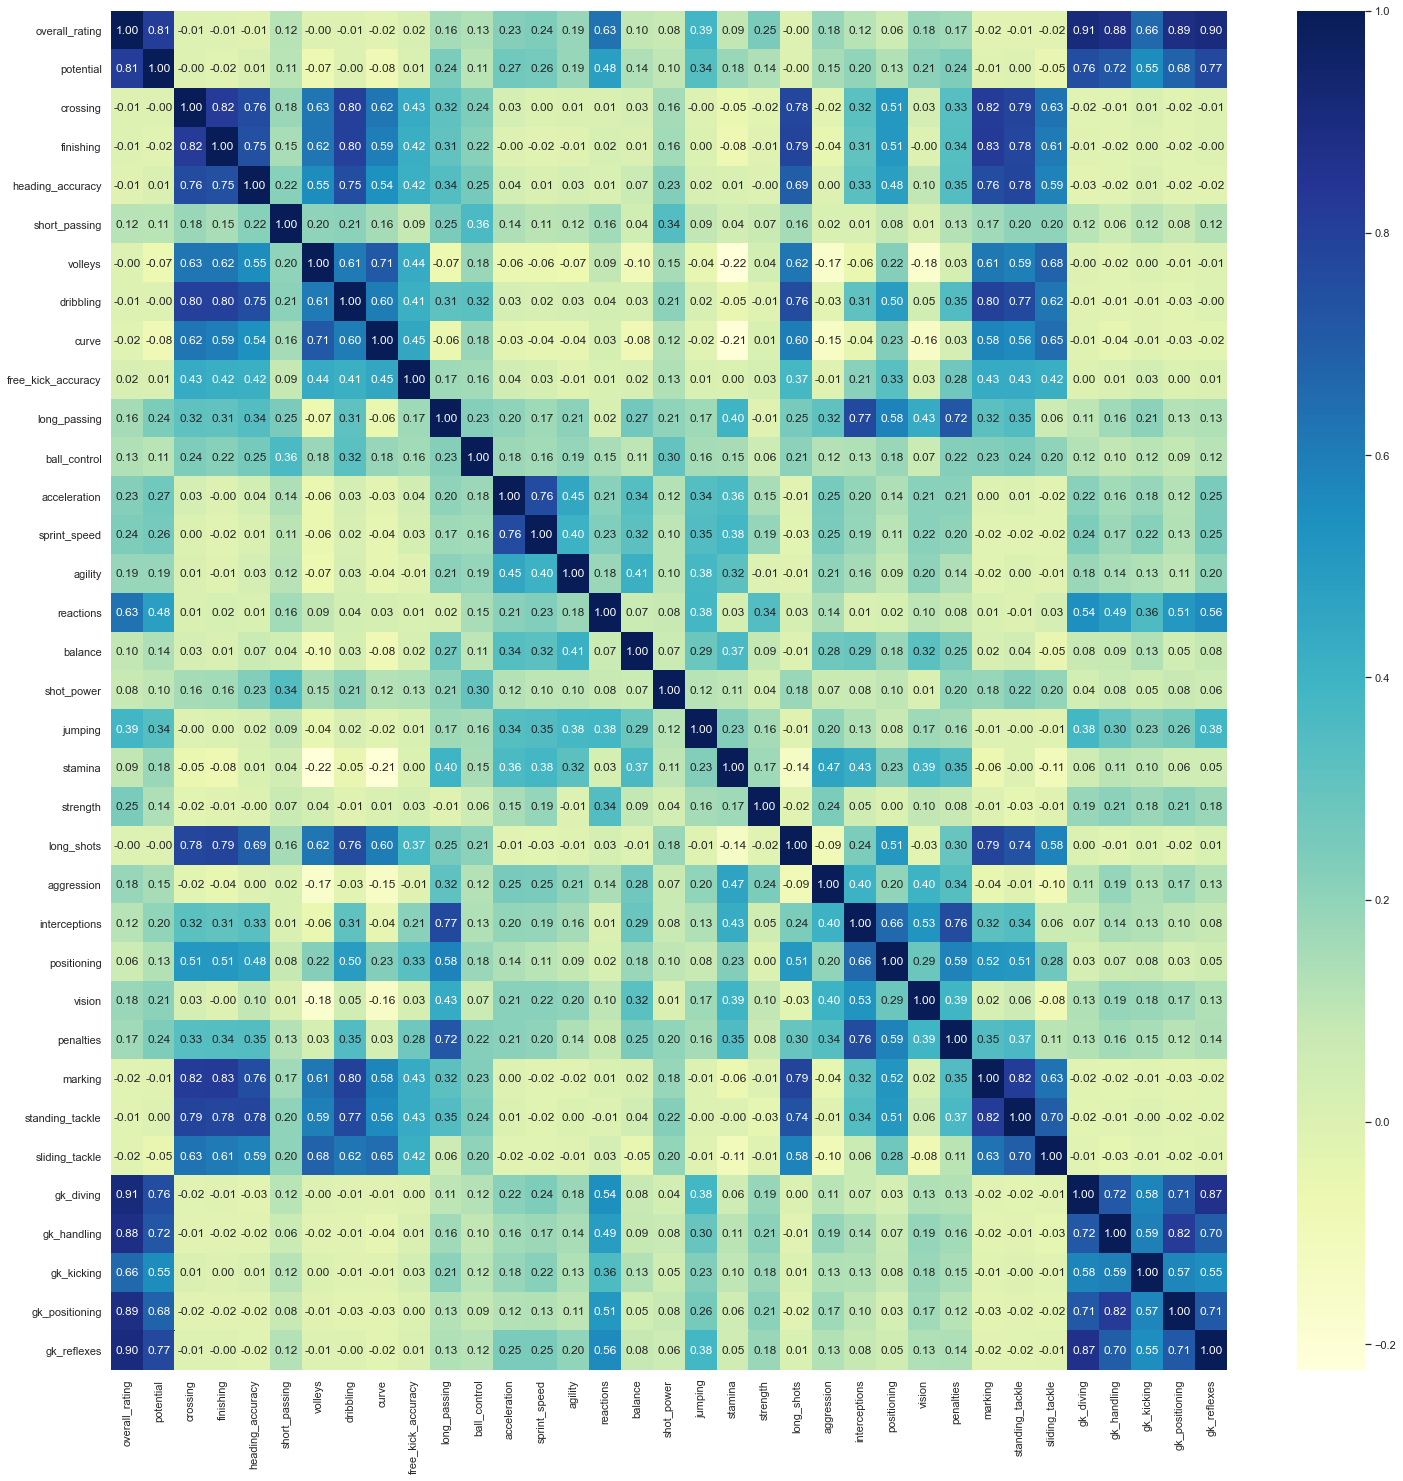

In [97]:
cor_matrix_g=data_g.corr()
sns.set(font_scale=1)
cor_matrix_g.to_csv("./newdata/cor_matrix_g.csv")
plt.figure(figsize=(25,25))
cor_map_g=sns.heatmap(cor_matrix_g,annot=True,fmt=".2f",cmap="YlGnBu")
heatmap=cor_map_g.get_figure()
heatmap.savefig("./newdata/cor_map_g.png")

In [31]:
columns=["overall_rating","potential","crossing","finishing","heading_accuracy","short_passing","volleys",
         "dribbling","curve","free_kick_accuracy","long_passing","ball_control","acceleration","sprint_speed","agility",
         "reactions","balance","shot_power","jumping","stamina","strength","long_shots","aggression","interceptions", 
         "positioning","vision","penalties","marking","standing_tackle","sliding_tackle","gk_diving","gk_handling",
         "gk_kicking","gk_positioning","gk_reflexes"]
data_nongk=pd.read_csv("./newdata/player_attributes_nongk.csv",usecols=columns)
data_nongk.dropna(axis=0,inplace=True)
data_nongk.drop_duplicates(inplace=True)
print(data_nongk.shape)

(104837, 35)


In [37]:
def looper1(limit):  
    cols=["crossing","finishing","heading_accuracy",
         "short_passing","volleys","dribbling","curve","free_kick_accuracy","long_passing","ball_control","acceleration",
         "sprint_speed","agility","reactions","balance","shot_power","jumping","stamina","strength","long_shots","aggression",
         "interceptions", "positioning","vision","penalties","marking","standing_tackle","sliding_tackle"]
    for i in range(len(cols)):  
        data1=data_nongk[cols]  
        x=sm.add_constant(data1)
        y=data_nongk["overall_rating"]  
        model=sm.OLS(y, x) 
        result=model.fit()
        coefvalues=result.params
        pvalues=result.pvalues  
        pvalues.drop("const",inplace=True) 
        coefvalues.drop("const",inplace=True) 
        pmax=max(pvalues)
        coefmin=min(coefvalues)
        if coefmin<0:
            ind_=coefvalues.idxmin() 
            cols.remove(ind_)
        if pmax>limit:
            ind=pvalues.idxmax() 
            cols.remove(ind)
        
        else:  
            return result
        
result=looper1(0.05)  
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                 1.696e+04
Date:                Sat, 11 Dec 2021   Prob (F-statistic):               0.00
Time:                        04:17:40   Log-Likelihood:            -2.6250e+05
No. Observations:              104837   AIC:                         5.250e+05
Df Residuals:                  104812   BIC:                         5.253e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  9.8148      0.128     76.790      0.000       9.564      10.065
crossing              -0.0210      0.001    -18.558      0.000      -0.023      -0.019
finishing              0.0101      0.001      8.051      0.000       0.008       0.013
heading_accuracy       0.1058      0.001     89.195      0.000       0.103       0.108
short_passing          0.0679      0.002     30.376      0.000       0.064       0.072
volleys                0.0045      0.001      3.908      0.000       0.002       0.007
dribbling             -0.0263      0.002    -15.232      0.000      -0.030      -0.023
curve                  0.0195      0.001     17.277      0.000       0.017       0.022
free_kick_accuracy     0.0063      0.001      6.241      0.000       0.004       0.008
long_passing           0.0253      0.002     16.269      0.000       0.022       0.028
ball_control           0.2416      0.002    100.556      0.000       0.237       0.246
acceleration           0.0429      0.002     20.988      0.000       0.039       0.047
sprint_speed           0.0392      0.002     20.877      0.000       0.036       0.043
agility               -0.0160      0.002    -10.422      0.000      -0.019      -0.013
reactions              0.2946      0.002    179.103      0.000       0.291       0.298
balance                0.0055      0.001      4.775      0.000       0.003       0.008
shot_power             0.0302      0.001     23.058      0.000       0.028       0.033
jumping                0.0022      0.001      2.221      0.026       0.000       0.004
strength               0.0529      0.001     42.486      0.000       0.050       0.055
long_shots            -0.0339      0.001    -26.045      0.000      -0.036      -0.031
aggression             0.0039      0.001      3.889      0.000       0.002       0.006
interceptions          0.0170      0.001     13.848      0.000       0.015       0.019
penalties              0.0119      0.001     10.748      0.000       0.010       0.014
marking                0.0381      0.002     25.010      0.000       0.035       0.041
sliding_tackle        -0.0184      0.001    -12.311      0.000      -0.021      -0.015
==============================================================================
Omnibus:                     1987.552   Durbin-Watson:                   0.377
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3212.285
Skew:                           0.185   Prob(JB):                         0.00
Kurtosis:                       3.774   Cond. No.                     4.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.24e+03. This might indicate that the

In [38]:
def looper2(limit):  
    cols=["crossing","finishing","heading_accuracy",
         "short_passing","volleys","dribbling","curve","free_kick_accuracy","long_passing","ball_control","acceleration",
         "sprint_speed","agility","reactions","balance","shot_power","jumping","stamina","strength","long_shots","aggression",
         "interceptions", "positioning","vision","penalties","marking","standing_tackle","sliding_tackle","gk_diving",
         "gk_handling","gk_kicking","gk_positioning","gk_reflexes"]
    for i in range(len(cols)):  
        data1=data_g[cols]  
        x=sm.add_constant(data1)
        y=data_g["overall_rating"]  
        model=sm.OLS(y, x) 
        result=model.fit()
        coefvalues=result.params
        pvalues=result.pvalues  
        pvalues.drop("const",inplace=True) 
        coefvalues.drop("const",inplace=True) 
        pmax=max(pvalues)
        coefmin=min(coefvalues)
        if coefmin<0:
            ind_=coefvalues.idxmin() 
            cols.remove(ind_)
        if pmax>limit:
            ind=pvalues.idxmax() 
            cols.remove(ind)
        
        else:  
            return result
        
result=looper2(0.05)  
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 9.369e+04
Date:                Sat, 11 Dec 2021   Prob (F-statistic):               0.00
Time:                        04:17:58   Log-Likelihood:                -10316.
No. Observations:               11109   AIC:                         2.066e+04
Df Residuals:                   11094   BIC:                         2.077e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.1643      0.071    -16.468      0.000      -1.303      -1.026
free_kick_accuracy     0.0048      0.001      7.704      0.000       0.004       0.006
ball_control           0.0043      0.001      4.049      0.000       0.002       0.006
reactions              0.0489      0.001     67.997      0.000       0.047       0.050
shot_power             0.0020      0.001      3.188      0.001       0.001       0.003
jumping                0.0053      0.001      7.964      0.000       0.004       0.007
stamina                0.0049      0.001      8.349      0.000       0.004       0.006
strength               0.0055      0.001      9.537      0.000       0.004       0.007
aggression             0.0022      0.000      4.476      0.000       0.001       0.003
interceptions          0.0034      0.001      6.502      0.000       0.002       0.004
gk_diving              0.2403      0.002    136.950      0.000       0.237       0.244
gk_handling            0.2102      0.002    137.846      0.000       0.207       0.213
gk_kicking             0.0435      0.001     46.274      0.000       0.042       0.045
gk_positioning         0.2278      0.001    156.755      0.000       0.225       0.231
gk_reflexes            0.2261      0.002    136.398      0.000       0.223       0.229
==============================================================================
Omnibus:                     6126.688   Durbin-Watson:                   1.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           692912.154
Skew:                          -1.696   Prob(JB):                         0.00
Kurtosis:                      41.542   Cond. No.                     2.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""